In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk', font_scale=1.5)
sns.set(color_codes=True)

%matplotlib inline

## Creating the data object

In [2]:
np.random.seed(2)
data = np.random.randn(16,20)

scales = .75*np.random.rand(20) + 0.25
data *= scales

no_variance = np.random.binomial(n=1, p=0.1, size=20)
data[:, no_variance.astype(bool)] = 0

dropout = np.random.binomial(n=1, p=0.05, size=20*16).reshape((16,20)).astype(bool)
data[dropout] = np.nan

In [3]:
def create_block(obj, filename, cmap=None, filetype='.png'):
    
    width = (4/20)*obj.shape[1]
    height = (4/20)*obj.shape[0]

    if cmap == None: cmap = 'Blues'
    
    fig = plt.figure(figsize=(width, height))
    ax = fig.add_subplot(111, aspect='equal')
    plt.axis('off')
    sns.heatmap(obj, cbar=False, ax=ax, cmap=cmap, linewidths=1, vmin=-2, vmax=2)
    fig.savefig('schem_blocks/' + filename + filetype, transparent=True)

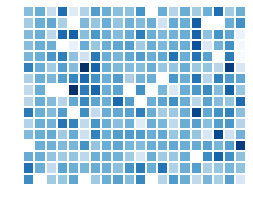

In [4]:
create_block(data, 'raw_descriptors')

Int64Index([1, 6, 8, 9], dtype='int64')


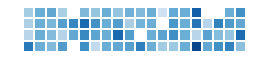

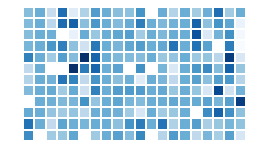

In [5]:
data_df = pd.DataFrame(data)
test = data_df.sample(4, random_state=0)
train = data_df[~data_df.index.isin(test.index)]

create_block(test, 'raw_test')
create_block(train, 'raw_train')

print(test.index)

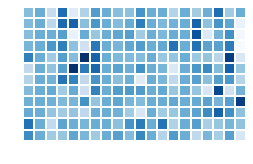

In [6]:
from sklearn.preprocessing import Imputer

train_imputed = Imputer().fit_transform(train)
create_block(train_imputed, 'train_imputed')

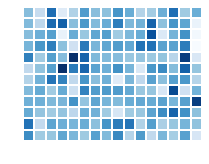

In [7]:
from sklearn.feature_selection import VarianceThreshold
train_threshold = VarianceThreshold().fit_transform(train_imputed)
create_block(train_threshold, 'train_threshold')

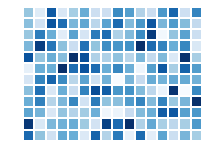

In [8]:
from sklearn.preprocessing import StandardScaler
train_scaled = StandardScaler().fit_transform(train_threshold)
create_block(train_scaled, 'train_scaled')

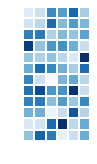

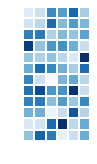

In [9]:
train_selected = pd.DataFrame(train_scaled).T.sample(n=6, random_state=0).T.values
create_block(train_selected, 'train_selected')
create_block(train_selected, 'train_selected', filetype='.svg')

### CV By functional group

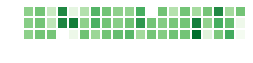

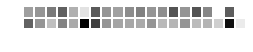

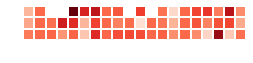

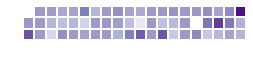

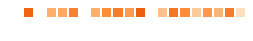

In [10]:
create_block(train[:3], 'train_gp_1', 'Greens')
create_block(train[3:5], 'train_gp_2', 'Greys')
create_block(train[5:8], 'train_gp_3', 'Reds')
create_block(train[8:11], 'train_gp_4', 'Purples')
create_block(train[11:], 'train_gp_5', 'Oranges')

### K-Fold CV

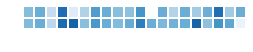

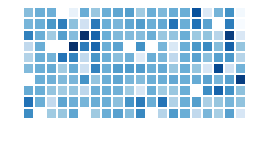

In [11]:
create_block(train[:2], 'train_kf1_test', 'Blues')
create_block(train[2:], 'train_kf1_train', 'Blues')

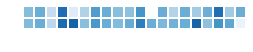

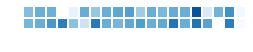

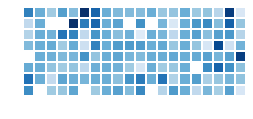

In [12]:
create_block(train[:2], 'train_kf2_train1', 'Blues')
create_block(train[2:4], 'train_kf2_test', 'Blues')
create_block(train[4:], 'train_kf2_train2', 'Blues')

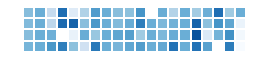

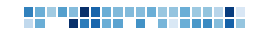

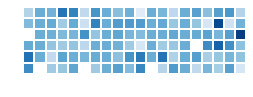

In [13]:
create_block(train[:4], 'train_kf3_train1', 'Blues')
create_block(train[4:6], 'train_kf3_test', 'Blues')
create_block(train[6:], 'train_kf3_train2', 'Blues')

In [14]:
from ysi_utils.data import low

In [15]:
from rdkit import Chem
from rdkit.Chem import rdDepictor, MolFromSmiles

In [16]:
low_mol = low.copy()
low_mol['ROMol'] = low.SMILES.apply(lambda x: MolFromSmiles(x))

In [17]:
#PandasTools.SaveSMILESFromFrame(low_mol.sample(10), 'out_small.smi', NamesCol='Species', isomericSmiles=True)

In [22]:
low.Type.unique()[pd.Series(low.Type.unique()).apply(len).argsort()]

array(['Alkenes', 'Aromatic', 'Linear Alkanes', 'Cyclic Alkanes',
       'Cyclic Alkenes', 'Saturated Ethers', 'Saturated Alcohols',
       'Unsaturated Esters', 'Saturated Alkanones', 'Saturated Aldehydes',
       'Alkynes and Alkadienes', 'Cyclic Saturated Ethers',
       'Other Multi-Oxygen Compounds',
       'Saturated Esters and Carboxylic Acids'], dtype=object)